# Proposale for Research Methodology

## 1. Introduction

### Majoity real estate transactions in Houston, Texas, are performed by licenced real estate agents. The platform for listing properties for sale or rent is usually called for Multiple Listing Service (MLS) and the one for Houston is delivered by Har.com. Prior to any sale of real estate brokers use different methods to determine the market price the property. One such method is called “comps” which is short for comparable sales. Comps are typically determined by comparing the property in question to other properties within a 1-mile radius, which have sold within the last year and have similar attributes (such as the same number of bedrooms, age, subdivision, square footage, pool, etc).

### In this analysis we like to test the hypothesis that having access to a private pool adds value to comps of a property compared those without such feature.

## 2. The dependent variable

### Pice per squar feet is the dependent variable that we like to test the feature of having access to private pool

## 3. Proposal

### We will test the hypothesis that the mean dolar per sqf value is the same for randomly selected properties, irrespective they have access to a private pool or not. The result of this hypotheis has a practicle implication for real estate transactions. A typical private pool will cost several thousandts of dollars to build and will cost more in monthly maintenance costs for many years. Therefore, one should consider if it is better decision to buy a house without a pool and build one later or buy with an existing pool. The result of this hypothesis can potentially impact buyer's decision as to pay extra for a property if the only difference with its next best alternative is access to such private pool. Ultimately, we like to know if having access to private pool adds value to a property market price.  


### Data

### We will download actual public data, from January 01, 2020, for properties that have been sold from hcad.org. One can argue that COVID-19 may have an adverse effects on the conclusion and this is something we can test in a follow-up analysis with for example dataset from 2019 only. 

### Methodolgy

### The price per squar feet is the dependent variable and for its success metric we choose degree of significance t-test with p-vale of .05. As part of data preparation we do several tasks such as remove dollar signs, drop rental properties, count missing or bad values etc.

#### Data exploration

In [54]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import mean
from numpy import var
from math import sqrt

import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import random

In [55]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 1000

In [56]:
# Read from pickled file
df0 = pd.read_csv(r'C:\Users\user\OneDrive - Seedergy\MAEN\Code\Projects\Courses\Thinkful2020\har mls data - 12June2020 to 22June2020.csv')

C:\Users\User\anaconda3\envs\prv\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (7,52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Title

In [57]:
df = df0.copy()

In [58]:
df.head(3)

,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Area,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Building SqFt,Price Sq Ft List,Price Sq Ft Sold,Lot Size,Acres,Price Acre List,Price Acre Sales,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,New Construction Desc,Pool Private,No Of Garage Cap,Style,DOM,CDOM,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date
0,71016023,Lots,Active,110,Evergreen,NaN,Burkeville,75932,Newton,$110,NaN,NaN,47.0,Toledo Villiage 5a,NaN,NaN,99 - Other,BURKEVILLE ELEMENTARY SCHOOL,BURKEVILLE MIDDLE SCHOOL,BURKEVILLE HIGH SCHOOL,NaN,$0.01,NaN,8960.0,0.2057,$535,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,KWBE01,Keller Williams Southeast Texa,WJBANGOY,Wendi Bangoy,NaN,NaN,NaN,NaN,NaN,6/22/2020 12:12,6/21/2020 0:00
1,3351600,Rental,Active,3613,Crane,2,Houston,77026,Harris,$625,NaN,NaN,2.0,Crane Street Woods Sec 02,NaN,Northside,27 - Houston,DOGAN ELEMENTARY SCHOOL,FLEMING MIDDLE SCHOOL,WHEATLEY HIGH SCHOOL,750.0,$0.83,NaN,7448.0,0.1710,"$3,655",NaN,1964.0,1.0,1.0,0.0,1.0,1.0,NaN,2.0,False,NaN,False,0.0,NaN,0,0,TXHF01,360 Realty & Management,zwingle,Wayne Comer,NaN,NaN,NaN,NaN,NaN,6/22/2020 13:54,6/22/2020 0:00
2,82066227,Rental,Active,6161,Reims Rd,NaN,Houston,77036,Harris,$700,NaN,NaN,21.0,Summerset Landing,NaN,Sharpstown Area,27 - Houston,PINEY POINT ELEMENTARY SCHOOL,REVERE MIDDLE SCHOOL,WISDOM HIGH SCHOOL,712.0,$0.98,NaN,NaN,NaN,NaN,NaN,1977.0,1.0,1.0,0.0,1.0,2.0,NaN,NaN,False,NaN,False,0.0,Traditional,0,0,RELM03,REALM Real Estate Professional,chinabo,Wayne Au,NaN,NaN,NaN,NaN,NaN,6/22/2020 21:32,6/22/2020 0:00


#### Replace NaN values with zeros for those features where the value zero meand null.

In [59]:
cols = ['List Price','Area', 'Building SqFt', 'Lot Size', 'Acres','Price Sq Ft List',
        'Year Built', 'Bedrooms', 'Baths Full', 'Baths Half', 'Baths Total',
        'Room Count', 'Fireplaces Number', 'Stories', 'No Of Garage Cap']
df[cols]=df[cols].fillna(0)
df = df.replace({'\$': ''},regex=True) 
df['Price Sq Ft List'] = pd.to_numeric(df['Price Sq Ft List'], errors='coerce')
#df["Price Sq Ft List"] = df["List Price"] / df["Building SqFt"]
# df["Price Sq Ft List"] = df["Price Sq Ft List"].str.replace(',', '').astype(float)

In [60]:
# Add a column of ones for future aggregations
df['ones'] = 1
# Map True/False to 1/0
df['New Construction'] = df['New Construction'] * 1
df['Pool Private'] = df['Pool Private'] * 1

In [61]:
# # Add $/sqf instead of absolute value
# df['Price Sq Ft List'] = df['Price Sq Ft List'] / df['Lot Size']
# # Convert division by zero which returns inf to NaN

# df['Price Sq Ft List'].replace([np.inf, -np.inf], np.nan,inplace=True)

In [62]:
df.head(2)

,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Area,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Building SqFt,Price Sq Ft List,Price Sq Ft Sold,Lot Size,Acres,Price Acre List,Price Acre Sales,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,New Construction Desc,Pool Private,No Of Garage Cap,Style,DOM,CDOM,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date,ones
0,71016023,Lots,Active,110,Evergreen,NaN,Burkeville,75932,Newton,110,NaN,NaN,47.0,Toledo Villiage 5a,NaN,NaN,99 - Other,BURKEVILLE ELEMENTARY SCHOOL,BURKEVILLE MIDDLE SCHOOL,BURKEVILLE HIGH SCHOOL,0.0,0.01,NaN,8960.0,0.2057,535,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1,1,KWBE01,Keller Williams Southeast Texa,WJBANGOY,Wendi Bangoy,NaN,NaN,NaN,NaN,NaN,6/22/2020 12:12,6/21/2020 0:00,1
1,3351600,Rental,Active,3613,Crane,2,Houston,77026,Harris,625,NaN,NaN,2.0,Crane Street Woods Sec 02,NaN,Northside,27 - Houston,DOGAN ELEMENTARY SCHOOL,FLEMING MIDDLE SCHOOL,WHEATLEY HIGH SCHOOL,750.0,0.83,NaN,7448.0,0.1710,"3,655",NaN,1964.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0,NaN,0,0.0,NaN,0,0,TXHF01,360 Realty & Management,zwingle,Wayne Comer,NaN,NaN,NaN,NaN,NaN,6/22/2020 13:54,6/22/2020 0:00,1


In [63]:
cols = ('Price Acre List','Price Acre Sales')

def replace_val(row):
        for col in cols:
            if row[col] == ',':
                row[col] = ''.astype(float)
            if row[col] == "FALSE":
                row[col] = 1
            else: 0
            
        return row
    
df = df.apply(replace_val, axis=1)

In [64]:
#df = df.drop(['Price Sq Ft List', 'Price Sq Ft Sold'], axis = 1) 

In [65]:
#df.info()

In [66]:
df.head(2)

,MLS Number,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Area,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Building SqFt,Price Sq Ft List,Price Sq Ft Sold,Lot Size,Acres,Price Acre List,Price Acre Sales,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,New Construction Desc,Pool Private,No Of Garage Cap,Style,DOM,CDOM,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date,ones
0,71016023,Lots,Active,110,Evergreen,NaN,Burkeville,75932,Newton,110,NaN,NaN,47.0,Toledo Villiage 5a,NaN,NaN,99 - Other,BURKEVILLE ELEMENTARY SCHOOL,BURKEVILLE MIDDLE SCHOOL,BURKEVILLE HIGH SCHOOL,0.0,0.01,NaN,8960.0,0.2057,535,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN,1,1,KWBE01,Keller Williams Southeast Texa,WJBANGOY,Wendi Bangoy,NaN,NaN,NaN,NaN,NaN,6/22/2020 12:12,6/21/2020 0:00,1
1,3351600,Rental,Active,3613,Crane,2,Houston,77026,Harris,625,NaN,NaN,2.0,Crane Street Woods Sec 02,NaN,Northside,27 - Houston,DOGAN ELEMENTARY SCHOOL,FLEMING MIDDLE SCHOOL,WHEATLEY HIGH SCHOOL,750.0,0.83,NaN,7448.0,0.1710,"3,655",NaN,1964.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,NaN,0.0,0.0,NaN,0,0,TXHF01,360 Realty & Management,zwingle,Wayne Comer,NaN,NaN,NaN,NaN,NaN,6/22/2020 13:54,6/22/2020 0:00,1


### Get some descriptive statistics for the data

In [67]:
# Numerical describe
df_stat = df.describe(include = [np.number]) 
df_stat.loc['dtype'] = df.dtypes
df_stat.loc['size'] = len(df)
df_stat.loc['% null'] = df.isnull().mean().round(2)
df_stat

,MLS Number,Area,Building SqFt,Price Sq Ft List,Lot Size,Acres,Year Built,Bedrooms,Baths Full,Baths Half,Baths Total,Room Count,Fireplaces Number,Stories,New Construction,Pool Private,No Of Garage Cap,DOM,CDOM,ones
count,20307,20307,20307,20295,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,19071,18991,20307,20307,20307,20307
mean,5.05858e+07,23.0824,2147.88,97.3475,26541.2,1.64219,1845.15,3.0814,2.10602,0.469739,2.153,6.78736,0.551288,1.41446,0.135232,0.105524,1.66342,43.8292,76.8926,1
std,2.81651e+07,15.9148,2401.08,94.0759,452789,23.2474,526.213,1.26878,0.984333,0.555771,1.00845,3.71058,0.613521,1.0999,0.34198,0.307235,1.64841,88.1995,158.759,0
min,202751,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-21,-5,1
25%,2.60131e+07,10,1433,1.32,4827.5,0,1976,3,2,0,2,4,0,1,0,0,1,4,5,1
50%,5.07339e+07,21,2030,103.92,7248,0.1573,2000,3,2,0,2.1,7,1,1,0,0,2,10,16,1
75%,7.50709e+07,33,2724,136.88,10478.5,0.2365,2013,4,3,1,3,9,1,2,0,0,2,49,86,1
max,9.93032e+07,87,288174,975.95,6.355e+07,1597,2021,12,13,9,13.1,28,11,31,1,1,64,1869,4468,1
dtype,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64
size,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307


In [68]:
# Non-numerical describe
df_stat = df.describe(include = ['O']) 
df_stat.loc['dtype'] = df.dtypes
df_stat.loc['size'] = len(df)
df_stat.loc['% null'] = df.isnull().mean().round(2)
df_stat

,Property Type,Status,Street Number,Street Name,Unit Number,City/Location,Zip Code,County,List Price,Close Price,Close Date,Subdivision,Master Planned Community,Market Area,School District,School Elementary,School Middle,School High,Price Sq Ft Sold,Price Acre List,Price Acre Sales,New Construction Desc,Style,List Office MLSID,List Office Name,List Agent MLSID,List Agent Full Name,Selling Office MLSID,Selling Office Name,Selling Agent MLSID,Selling Agent Full Name,Realist Owner Name,Last Change Timestamp,List Date
count,20307,20307,20304,20307,2115,20307,20307,20307,20307,4676,4676,19974,3143,19317,20307,20008,20195,20233,4592,14873,3506,2579,16402,20307,20307,20307,20307,10907,10907,10908,10908,18,20307,15457
unique,7,9,7966,12448,876,363,772,94,3792,1489,11,10938,110,201,182,1031,459,354,2720,13381,3377,2,108,2403,2202,8643,8511,1793,1623,7337,7034,13,8629,507
top,Single-Family,Active,0,N Texas Ave,B,Houston,77494,Harris,"1,500","1,500",6/15/2020 0:00,None,The Woodlands,Katy - Southwest,27 - Houston,GISD OPEN ENROLL,HOGG MIDDLE SCHOOL (HOUSTON),LAMAR HIGH SCHOOL (HOUSTON),0.95,"30,000",,To Be Built/Under Construction,Traditional,EXPD01,Keller Williams Realty,zainkhan,Lance Loken,nonmls,Non-MLS,nonmls,Non-MLS Agent,Panza Verde Residential Partne,6/14/2020 0:10,6/19/2020 0:00
freq,12002,6235,387,66,135,7095,449,11061,199,65,978,128,478,616,4430,452,479,926,37,14,11,1581,12191,429,1090,194,220,712,712,456,712,6,67,1041
dtype,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
size,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307,20307
% null,0,0,0,0,0.9,0,0,0,0,0.77,0.77,0.02,0.85,0.05,0,0.01,0.01,0,0.77,0.27,0.83,0.87,0.19,0,0,0,0,0.46,0.46,0.46,0.46,1,0,0.24


## Does having private pool add value to the property?

In [69]:
# We drop rows with missing pool data and this should not casue any problem as they stand for 6% of total dataset
df = df.dropna(subset=['Pool Private'])
# Drop NaN from Price Sq Ft List $/SQF as these were calcualted from dividing Price Sq Ft List with lost size
df = df.dropna(subset=['Price Sq Ft List'])
# Remove rentals as the the rent since, being much smaller than listing price, distorsts the analysis
df = df[df['Property Type'] != 'Rental']

In [70]:
# How large is each group?
print('test sample size:', len(df[df['Pool Private'] == 1]))
print('control sample size:', len(df[df['Pool Private'] == 0]))
print('test proportion:', len(df[df['Pool Private'] == 1])/ len(df))
print()

# Are the test and control groups significantly different?
stats.ttest_ind(df[df['Pool Private'] == 1]['Price Sq Ft List'],
                df[df['Pool Private'] == 0]['Price Sq Ft List'])

test sample size: 1764
control sample size: 11792
test proportion: 0.13012688108586604



Ttest_indResult(statistic=14.454940984116263, pvalue=5.217380454704521e-47)

### p-value is less than 0.5 and based on this we can reject the null hypothesis and claim that there is a difference in price for properties with access to private pool. However, we also need to check if the assumption of normality is not violated in this t-test. We will do this both visually and with Shapiro-Wilk test statistic

DescribeResult(nobs=1764, minmax=(0.0, 975.95), mean=169.5242403628118, variance=10905.940185185527, skewness=3.0061045662014387, kurtosis=12.103304788127028)
(0.7661536931991577, 0.0)


C:\Users\User\anaconda3\envs\prv\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


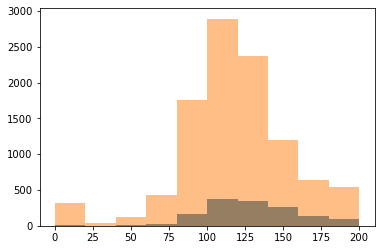

In [71]:
print(stats.describe(df[df['Pool Private'] == 1]['Price Sq Ft List']))
print(stats.shapiro(df[df['Pool Private'] == 0]['Price Sq Ft List']))
plt.hist(df[df['Pool Private'] == 1]['Price Sq Ft List'], bins=10, range=(0, 200), alpha = .95)
plt.hist(df[df['Pool Private'] == 0]['Price Sq Ft List'], bins=10, range=(0, 200), alpha = .5)
plt.show()

### The shape is not a perfect bell-shape however and this is also confirmed by W statistc at 0.8 indicating that the distribution is not very close to a normal distribution

#### Another option for comparing the frequencies is with boxplot

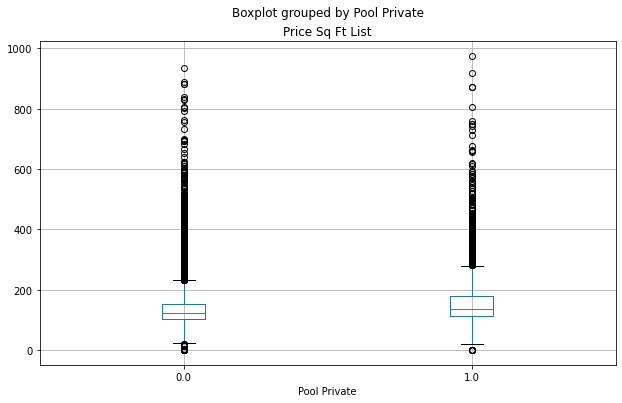

In [72]:
#Create a boxplot
df.boxplot('Price Sq Ft List', by='Pool Private', figsize=(10, 6))

## The t-test at .05 significance proved that there is a difference in mean values of these two groups. Now we should calculate the scale of this difference so to see the real life implication of such difference. This is called the effect size.

### For the effect size we will use Cohen’s d that measures the difference between the mean from two Gaussian-distributed variables. This assumption allows us to use the standard score and summarizes the difference in terms of the number of standard deviations. And here is one interpretation of such standarization:Small Effect Size: d=0.20, Medium Effect Size: d=0.50, Large Effect Size: d=0.80.

In [90]:
# function to calculate cohen's d for independet samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate teh variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    #calculate the pooled standard deviation
    s = sqrt(((n1 -1) * s1 + (n2 -1) *s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [95]:
# function to calcualte pooled standard deviation
def pooled_std(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate teh variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    #calculate the pooled standard deviation
    s = sqrt(((n1 -1) * s1 + (n2 -1) *s2) / (n1 + n2 - 2))
    return s

In [96]:
# Calcualte d
sample1 = df[df['Pool Private'] == 1]['Price Sq Ft List']
sample2 = df[df['Pool Private'] == 0]['Price Sq Ft List']

d = cohend(sample1, sample2)
s = pooled_std(sample1, sample2)
print('Cohen d: %3f' % d)
print ('Pooled standard deviation: %3f' % s)

Cohen d: 0.369011
Pooled standard deviation: 80.449636


### We can see that the difference between the mean is 40% of one standards deviation interpreted as a medium effect size. This implies properties with pools deviate with 32 dollar per sqf. This is too big to be true. I suspect the result is becasue of more expensive properties tend to have private pool. This means our samples are not randomized properly